# Forecasting the Sales Of Supermarket

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("train.csv")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [7]:
df.nunique()

Row ID           9800
Order ID         4922
Order Date       1230
Ship Date        1326
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              529
State              49
Postal Code       626
Region              4
Product ID       1861
Category            3
Sub-Category       17
Product Name     1849
Sales            5757
dtype: int64

In [9]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

# Delete unnecessary columns


In [10]:
df.drop(columns=["Row ID",'Order ID'],inplace=True)

In [11]:
df.describe()

,Postal Code,Sales
count,9789.000000,9800.000000
mean,55273.322403,230.769059
std,32041.223413,626.651875
min,1040.000000,0.444000
25%,23223.000000,17.248000
50%,58103.000000,54.490000
75%,90008.000000,210.605000
max,99301.000000,22638.480000


In [12]:
df.describe(include="O")

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800
unique,1230,1326,4,793,793,3,1,529,49,4,1861,3,17,1849
top,05/09/2017,26/09/2018,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,38,34,5859,35,35,5101,9800,891,1946,3140,19,5909,1492,47


In [13]:
df.isnull().sum()

Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

# check the null data


In [14]:
df[df['Postal Code'].isnull()]

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


Burlington (specially Vermont) is the City in 11 row doesn't have Postal Code (fill them)

In [15]:
#the postal code of Burlington in Vermont
df['Postal Code'] = df['Postal Code'].fillna(5401)

In [16]:
df.isnull().sum()

Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [17]:
df.col

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order Date     9800 non-null   object 
 1   Ship Date      9800 non-null   object 
 2   Ship Mode      9800 non-null   object 
 3   Customer ID    9800 non-null   object 
 4   Customer Name  9800 non-null   object 
 5   Segment        9800 non-null   object 
 6   Country        9800 non-null   object 
 7   City           9800 non-null   object 
 8   State          9800 non-null   object 
 9   Postal Code    9800 non-null   float64
 10  Region         9800 non-null   object 
 11  Product ID     9800 non-null   object 
 12  Category       9800 non-null   object 
 13  Sub-Category   9800 non-null   object 
 14  Product Name   9800 non-null   object 
 15  Sales          9800 non-null   float64
dtypes: float64(2), object(14)
memory usage: 1.2+ MB


Ship Date and Order Date must convet to date value to calculate shipping date in new row

In [22]:
df['Order Date']=pd.to_datetime(df["Order Date"])
df['Ship Date']=pd.to_datetime(df["Ship Date"])

C:\Users\hp\AppData\Local\Temp\ipykernel_12852\1217220544.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Order Date']=pd.to_datetime(df["Order Date"])
C:\Users\hp\AppData\Local\Temp\ipykernel_12852\1217220544.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Ship Date']=pd.to_datetime(df["Ship Date"])


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Date     9800 non-null   datetime64[ns]
 1   Ship Date      9800 non-null   datetime64[ns]
 2   Ship Mode      9800 non-null   object        
 3   Customer ID    9800 non-null   object        
 4   Customer Name  9800 non-null   object        
 5   Segment        9800 non-null   object        
 6   Country        9800 non-null   object        
 7   City           9800 non-null   object        
 8   State          9800 non-null   object        
 9   Postal Code    9800 non-null   float64       
 10  Region         9800 non-null   object        
 11  Product ID     9800 non-null   object        
 12  Category       9800 non-null   object        
 13  Sub-Category   9800 non-null   object        
 14  Product Name   9800 non-null   object        
 15  Sales          9800 n

     arrange the date as day,month,year to avoid get wrong answer.

In [25]:
df['Order Date'] = df['Order Date'].dt.strftime('%d-%m-%Y')
df['Ship Date'] = df['Ship Date'].dt.strftime('%d-%m-%Y')

In [26]:
df.sample(4)

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9796,01-12-2016,17-01-2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
4350,04-11-2018,15-04-2018,Standard Class,JL-15130,Jack Lebron,Consumer,United States,Lancaster,Ohio,43130.0,East,OFF-ST-10001325,Office Supplies,Storage,Sterilite Officeware Hinged File Box,16.768
9545,29-10-2015,11-02-2015,Standard Class,NC-18625,Noah Childs,Corporate,United States,Columbus,Indiana,47201.0,Central,TEC-AC-10003433,Technology,Accessories,Maxell 4.7GB DVD+R 5/Pack,1.980
1274,26-05-2017,26-05-2017,Same Day,MS-17710,Maurice Satty,Consumer,United States,Fort Worth,Texas,76106.0,Central,FUR-CH-10001973,Furniture,Chairs,Office Star Flex Back Scooter Chair with White...,388.430


In [27]:
df['Order Date']=pd.to_datetime(df["Order Date"])
df['Ship Date']=pd.to_datetime(df["Ship Date"])

C:\Users\hp\AppData\Local\Temp\ipykernel_12852\1217220544.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Order Date']=pd.to_datetime(df["Order Date"])
C:\Users\hp\AppData\Local\Temp\ipykernel_12852\1217220544.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Ship Date']=pd.to_datetime(df["Ship Date"])


In [28]:
df.sample(4)

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9424,2015-07-23,2015-07-27,Standard Class,NC-18535,Nick Crebassa,Corporate,United States,San Francisco,California,94122.0,West,TEC-AC-10002167,Technology,Accessories,Imation 8gb Micro Traveldrive Usb 2.0 Flash Drive,45.000
5048,2015-03-31,2015-04-04,Standard Class,DD-13570,Dorothy Dickinson,Consumer,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10002071,Office Supplies,Binders,Fellowes Black Plastic Comb Bindings,8.134
2976,2018-12-04,2018-12-04,Same Day,DV-13045,Darrin Van Huff,Corporate,United States,Philadelphia,Pennsylvania,19143.0,East,FUR-CH-10001797,Furniture,Chairs,"Safco Chair Connectors, 6/Carton",188.552
1303,2018-07-03,2018-07-07,Standard Class,CS-12460,Chuck Sachs,Consumer,United States,Columbus,Georgia,31907.0,South,FUR-FU-10002554,Furniture,Furnishings,"Westinghouse Floor Lamp with Metal Mesh Shade,...",23.990


In [29]:
df['ShippingDays']=(df['Ship Date']-df['Order Date']).dt.days

In [30]:
df.sample(10)

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,ShippingDays
1561,2018-09-05,2018-09-06,First Class,CS-12400,Christopher Schild,Home Office,United States,Seattle,Washington,98115.0,West,OFF-AR-10003732,Office Supplies,Art,Newell 333,2.780,1
2601,2017-06-04,2017-06-04,Same Day,EN-13780,Edward Nazzal,Consumer,United States,New York City,New York,10035.0,East,OFF-PA-10000349,Office Supplies,Paper,Easy-staple paper,14.940,0
1238,2015-08-11,2015-08-15,Standard Class,GM-14680,Greg Matthias,Consumer,United States,Seattle,Washington,98105.0,West,FUR-FU-10003691,Furniture,Furnishings,"Eldon Image Series Desk Accessories, Ebony",12.350,4
8632,2017-07-28,2017-07-29,First Class,OT-18730,Olvera Toch,Consumer,United States,Bethlehem,Pennsylvania,18018.0,East,OFF-BI-10000545,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,1369.764,1
8835,2018-09-24,2018-09-28,Standard Class,KF-16285,Karen Ferguson,Home Office,United States,Sandy Springs,Georgia,30328.0,South,OFF-AR-10000614,Office Supplies,Art,Barrel Sharpener,14.280,4
4981,2017-12-09,2017-12-13,Second Class,RW-19630,Rob Williams,Corporate,United States,Chicago,Illinois,60610.0,Central,TEC-AC-10000199,Technology,Accessories,Kingston Digital DataTraveler 8GB USB 2.0,19.040,4
648,2017-12-11,2017-12-16,Second Class,AR-10825,Anthony Rawles,Corporate,United States,Vancouver,Washington,98661.0,West,FUR-FU-10001935,Furniture,Furnishings,3M Hangers With Command Adhesive,14.800,5
3961,2016-10-19,2016-10-24,Standard Class,NH-18610,Nicole Hansen,Corporate,United States,Detroit,Michigan,48227.0,Central,TEC-PH-10002564,Technology,Phones,OtterBox Defender Series Case - Samsung Galaxy S4,149.950,5
2785,2016-09-21,2016-09-23,First Class,CD-12790,Cynthia Delaney,Home Office,United States,Los Angeles,California,90036.0,West,FUR-CH-10004997,Furniture,Chairs,Hon Every-Day Series Multi-Task Chairs,601.536,2
7588,2018-11-16,2018-11-22,Standard Class,MB-18085,Mick Brown,Consumer,United States,Roseville,California,95661.0,West,FUR-FU-10001196,Furniture,Furnishings,DAX Cubicle Frames - 8x10,17.310,6


# visualize the Shipping days

<Axes: xlabel='ShippingDays'>

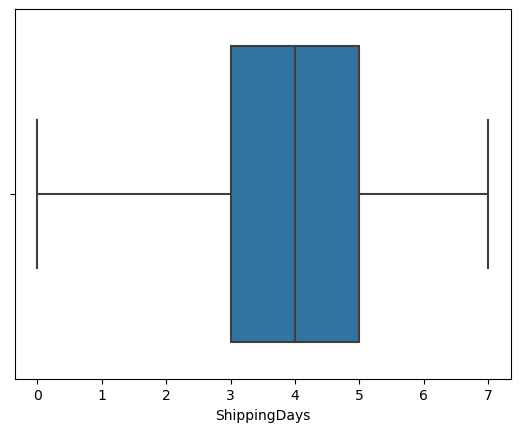

In [31]:
sns.boxplot(x="ShippingDays",data=df)

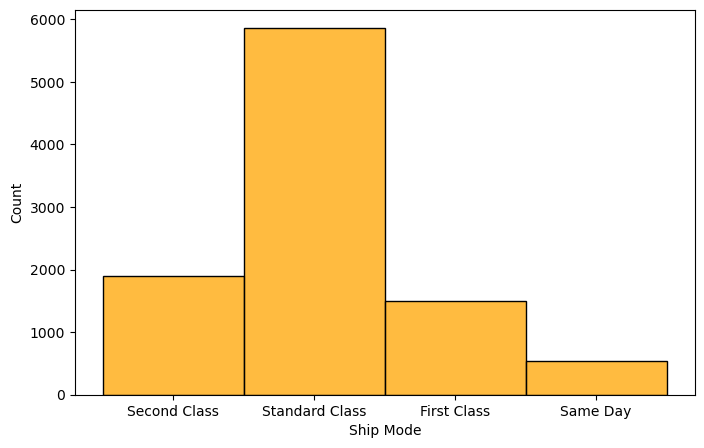

In [32]:
plt.figure(figsize=(8,5))

sns.histplot(x='Ship Mode', data=df,color='orange')

plt.show()

# Types of Segment

In [33]:
df["Segment"].value_counts()

Consumer       5101
Corporate      2953
Home Office    1746
Name: Segment, dtype: int64

# What is the ratio of segment ?

In [38]:
l = df["Segment"].value_counts().to_list()
lbl=['Consumer','Corporate','Home Office']
colors=['#FFDBC3','#9F91CC','#DAC0A3']

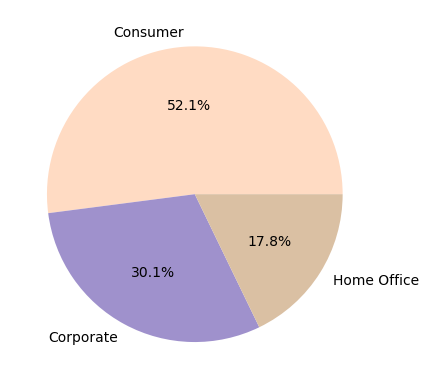

In [39]:
plt.pie(l,labels=lbl, autopct='%1.1f%%',colors=colors)
plt.show()

# how many Countries make sales ?

In [40]:
df['Country'].value_counts()

United States    9800
Name: Country, dtype: int64

In [41]:
df.columns.to_list()

['Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'ShippingDays']

In [45]:
df['State'].value_counts()

California              1946
New York                1097
Texas                    973
Pennsylvania             582
Washington               504
Illinois                 483
Ohio                     454
Florida                  373
Michigan                 253
North Carolina           247
Virginia                 224
Arizona                  223
Tennessee                183
Colorado                 179
Georgia                  177
Kentucky                 137
Indiana                  135
Massachusetts            135
Oregon                   122
New Jersey               122
Maryland                 105
Wisconsin                105
Delaware                  93
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              55
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 41
Nevada        

In [46]:
dic=df['State'].value_counts().to_dict()

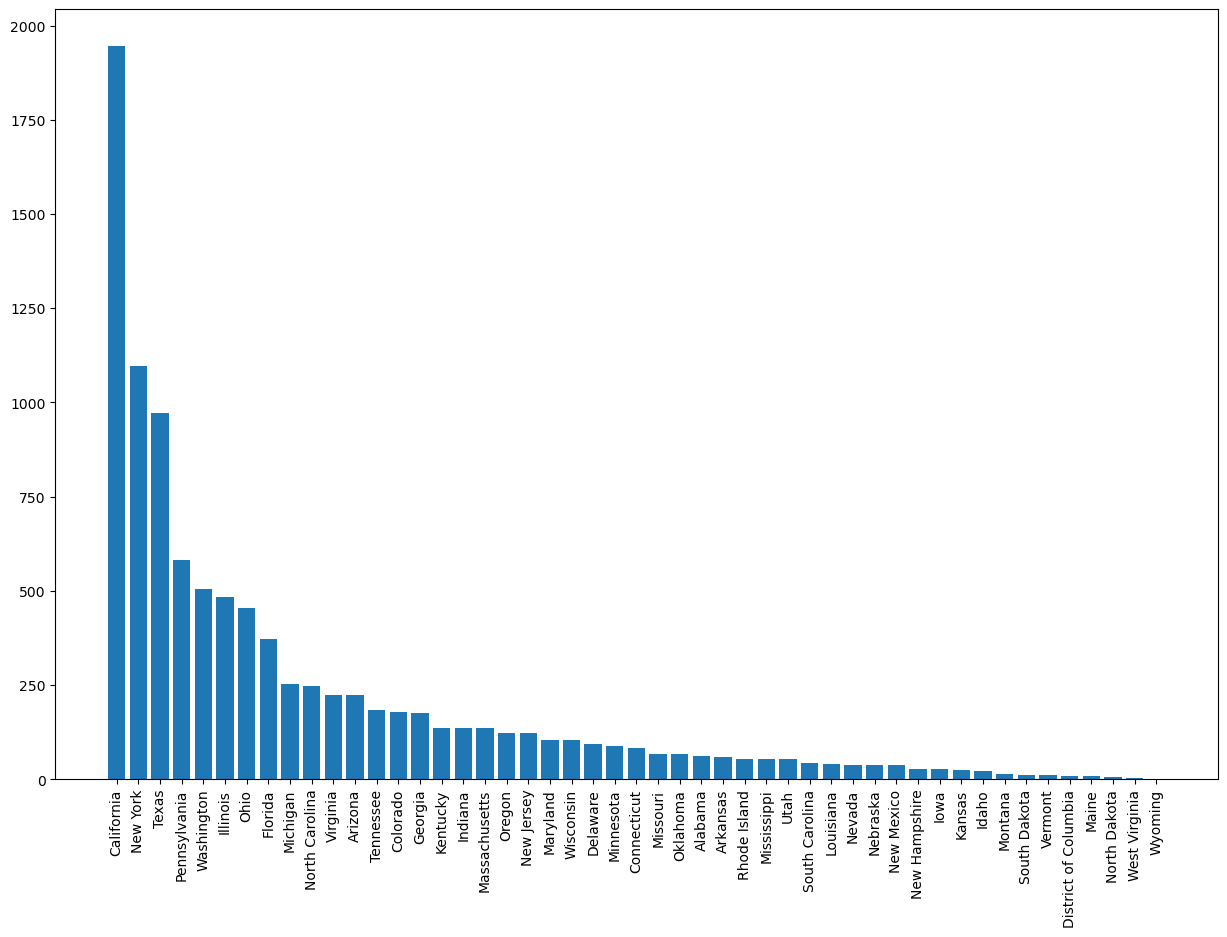

In [48]:
fig = plt.figure(figsize = (15, 10))
plt.bar(list(dic.keys()),list(dic.values()))
plt.xticks(fontsize=10, rotation=90)
plt.show()

# what is the ratio of Category ?

In [49]:
df['Sub-Category'].value_counts()

Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: Sub-Category, dtype: int64

# Visualize Region with Sales

<Axes: xlabel='Region', ylabel='Sales'>

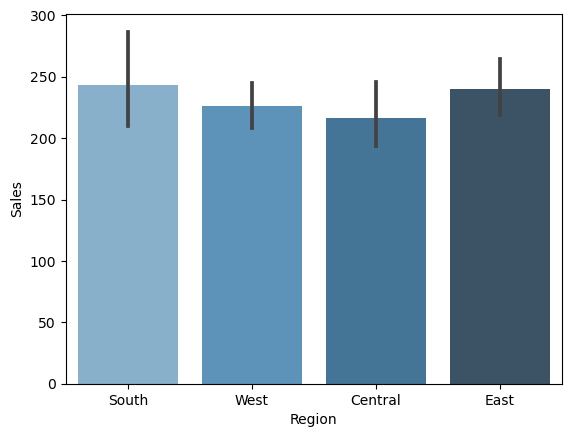

In [53]:
sns.barplot(data=df,x="Region",y="Sales",palette="Blues_d")

# describe the Sales

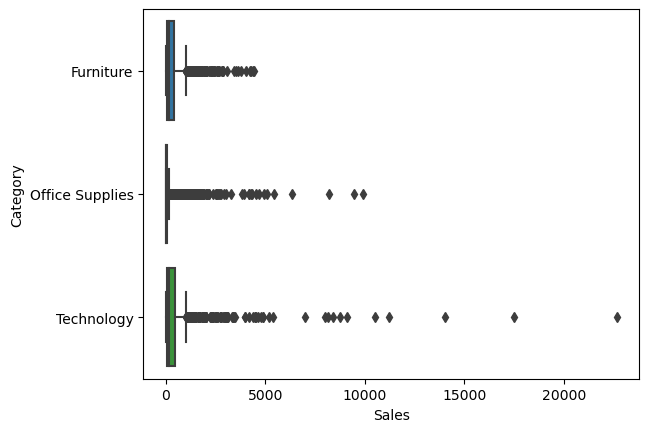

In [54]:
sns.boxplot(x=df['Sales'],y=df["Category"])
plt.show()

there are alot of outliers in data that effect in mean and median of sales


In [55]:
df.Sales.describe()

count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64

In [56]:
df.nunique()

Order Date       1230
Ship Date        1326
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              529
State              49
Postal Code       627
Region              4
Product ID       1861
Category            3
Sub-Category       17
Product Name     1849
Sales            5757
ShippingDays        8
dtype: int64

# which customer make the most operation ?

In [57]:
df["Customer Name"].value_counts()

William Brown          35
Matt Abelman           34
Paul Prost             34
John Lee               33
Chloris Kastensmidt    32
                       ..
Jocasta Rupert          1
Carl Jackson            1
Sung Chung              1
Ricardo Emerson         1
Anthony O'Donnell       1
Name: Customer Name, Length: 793, dtype: int64

In [58]:
Top_customers = df.groupby(["Customer Name"]).sum().sort_values("Sales", ascending=False).head(20)
Top_customers = Top_customers[["Sales"]].round(2) # Round off the Sales Value up to 2 decimal places
Top_customers.reset_index(inplace=True)
Top_customers

C:\Users\hp\AppData\Local\Temp\ipykernel_12852\2676061098.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Top_customers = df.groupby(["Customer Name"]).sum().sort_values("Sales", ascending=False).head(20)


,Customer Name,Sales
0,Sean Miller,25043.05
1,Tamara Chand,19052.22
2,Raymond Buch,15117.34
3,Tom Ashbrook,14595.62
4,Adrian Barton,14473.57
5,Ken Lonsdale,14175.23
6,Sanjit Chand,14142.33
7,Hunter Lopez,12873.30
8,Sanjit Engle,12209.44
9,Christopher Conant,12129.07


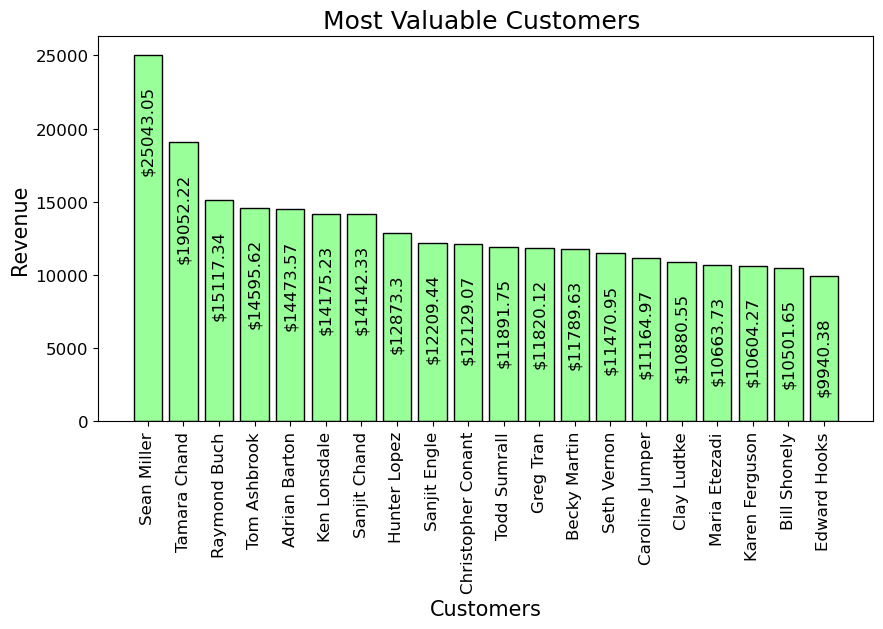

In [59]:
plt.figure(figsize = (10,5))
plt.title("Most Valuable Customers ", fontsize=18) 
plt.bar(Top_customers["Customer Name"], Top_customers["Sales"],color= '#99ff99',edgecolor="k", linewidth = 1)
plt.xlabel("Customers",fontsize=15) # x axis shows the customers 
plt.ylabel("Revenue",fontsize=15) # y axis shows the Revenue
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in Top_customers["Sales"].items():
    plt.text(k,v-8000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center')

# what is the most product sold ?

In [60]:
Top_Product = df.groupby(["Product Name"]).count().sort_values("Sales", ascending=False).head(20)
Top_Product = Top_Product[["Sales"]].round(2) # Round off the Sales Value up to 2 decimal places
Top_Product.reset_index(inplace=True)
Top_Product

,Product Name,Sales
0,Staple envelope,47
1,Staples,46
2,Easy-staple paper,44
3,Avery Non-Stick Binders,20
4,Staple remover,18
5,Staples in misc. colors,18
6,KI Adjustable-Height Table,17
7,Storex Dura Pro Binders,17
8,Staple-based wall hangings,16
9,Logitech 910-002974 M325 Wireless Mouse for We...,15


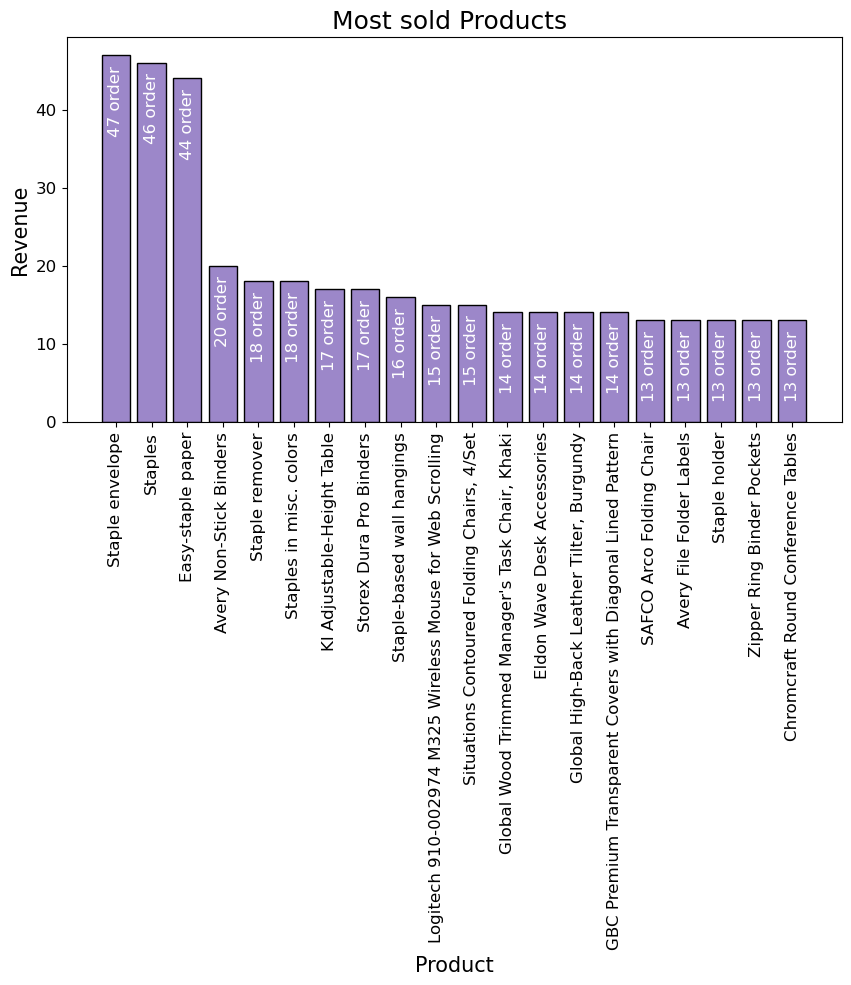

In [61]:
plt.figure(figsize = (10,5))
plt.title("Most sold Products ", fontsize=18) 
plt.bar(Top_Product["Product Name"], Top_Product["Sales"],color= '#9c87c9',edgecolor="k", linewidth = 1)
plt.xlabel("Product",fontsize=15) # x axis shows the customers 
plt.ylabel("Revenue",fontsize=15) # y axis shows the Revenue
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in Top_Product["Sales"].items():
    plt.text(k,v-10, str(v)+" order", fontsize=12,rotation=90,color='w', horizontalalignment='center')

# Most Category Sold

In [62]:
df['Category'].value_counts()

Office Supplies    5909
Furniture          2078
Technology         1813
Name: Category, dtype: int64

In [63]:
lbl= df['Category'].value_counts().index.to_list()
lbl

['Office Supplies', 'Furniture', 'Technology']

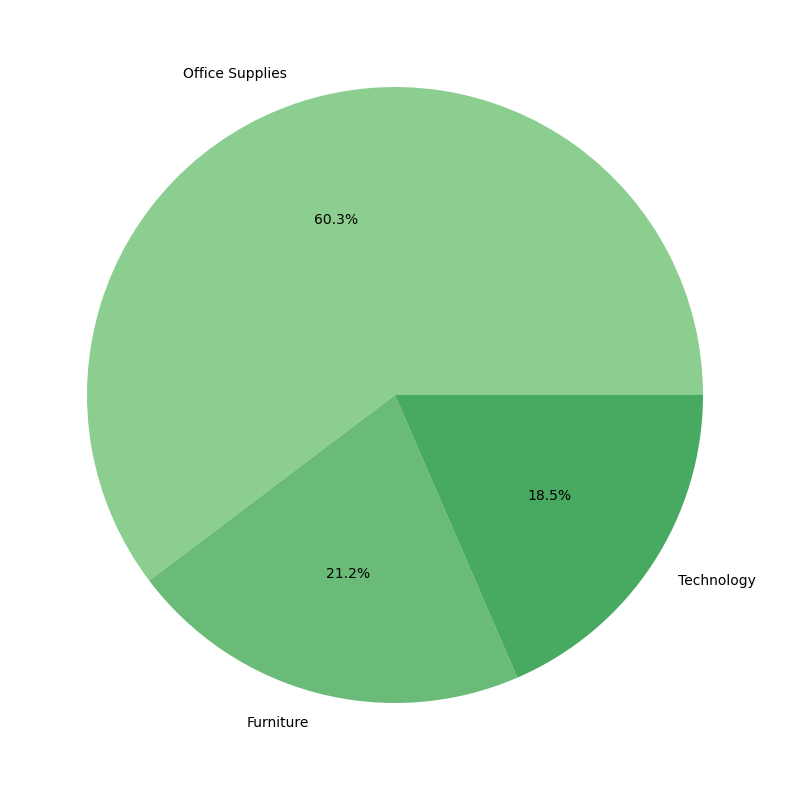

In [67]:
plt.figure(figsize=(10,10))
plt.pie(df['Category'].value_counts(),labels=lbl, autopct='%1.1f%%', colors=sns.color_palette("Greens_d"))
plt.show()

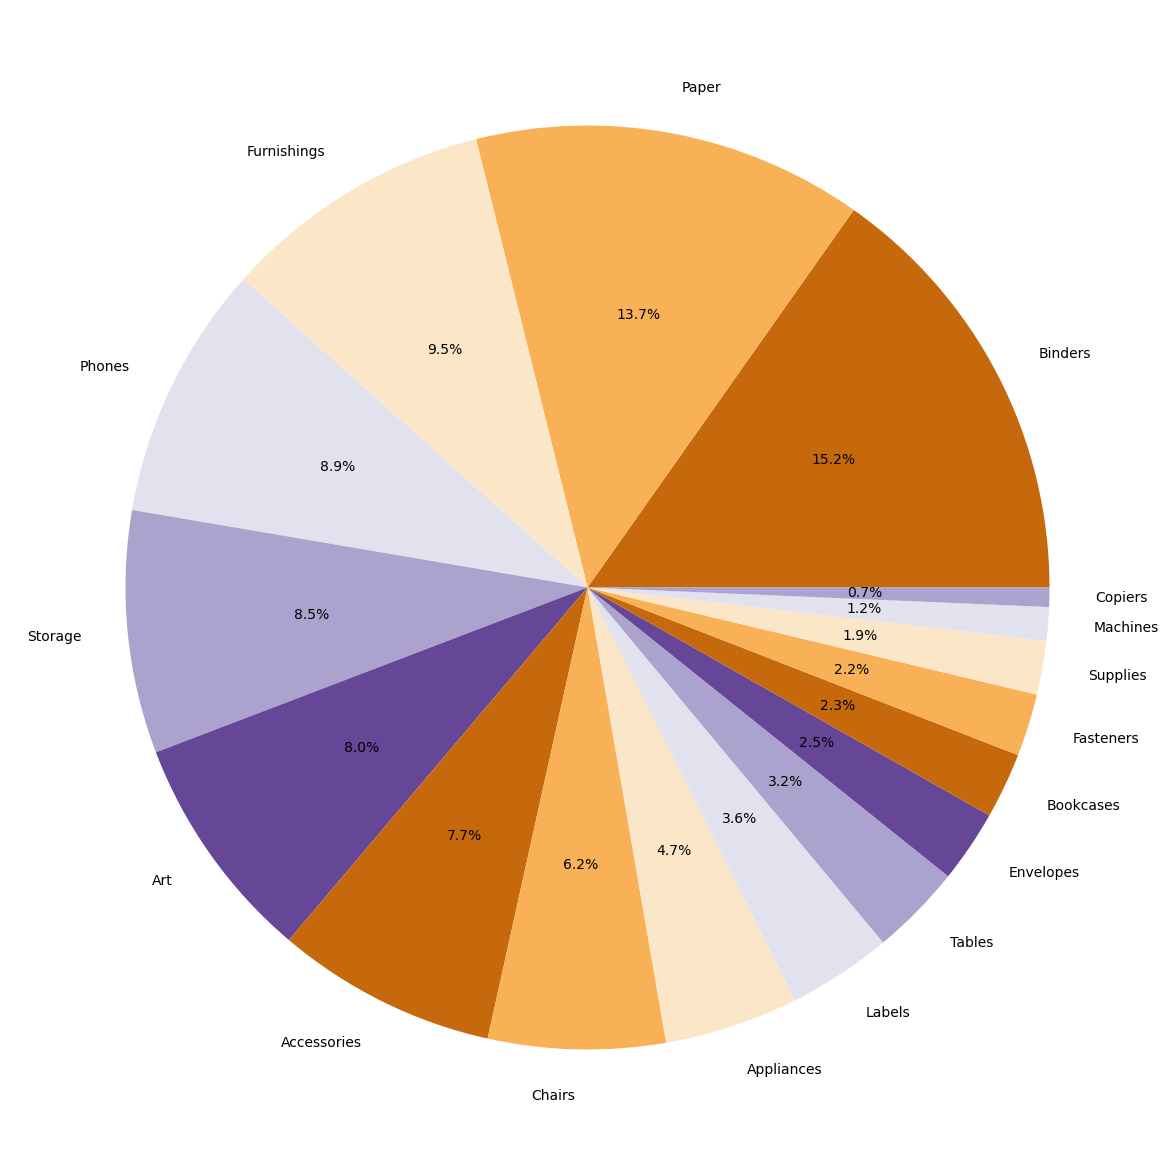

In [68]:
lbl2= df['Sub-Category'].value_counts().index.to_list()
plt.figure(figsize=(15,15))
plt.pie(df['Sub-Category'].value_counts(),labels=lbl2, autopct='%1.1f%%', colors=sns.color_palette("PuOr"))
plt.show()
